In [1]:
import pandas as pd
import os
import random

In [2]:
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

idle_files = [file for file in os.listdir(idle_directory)]
attack_files = [file for file in os.listdir(attack_directory)]

file = idle_directory + idle_files[1]
file

'../data/combined data files/idle/Idle_20241118_113051.csv'

In [7]:
df = pd.read_csv(file)
# df.columns.tolist()

In [8]:
branch_misses = "Branch Misses"
branch_instructions = "Branch Instructions"
branch_miss_rate = "Branch Miss Rate"

cache_misses = "Cache Misses"
cache_references = "Cache References"
cache_miss_rate = "Cache Miss Rate"

executed_branch_mispredictions = "Executed Branch Mispredictions"
executed_branch_instructions = "Executed Branch Instructions"
executed_branch_misprediction_rate = "Executed Branch Misprediction Rate"

retired_branch_mispredictions = "Retired Branch Mispredictions"
retired_branch_instructions = "Retired Branch Instructions"
retired_branch_misprediction_rate = "Retired Branch Misprediction Rate"

executed_conditional_branch_mispredictions = "Executed Conditional Branch Mispredictions"
executed_conditional_branches = "Executed Conditional Branches"
executed_conditional_misprediction_rate = "Executed Conditional Misprediction Rate"

retired_near_taken_mispredictions = "Retired Near-Taken Branch Mispredictions"
retired_conditional_branches = "Retired Conditional Branches"
retired_near_taken_misprediction_rate = "Retired Near-Taken to Conditional misprediction Rate"

# Variables provided by you for L1, L2, and L3 cache metrics
L1_data_load_misses = "L1 Data Cache Load Misses"
L1_data_load_all = "L1 Data Cache Loads"
L1_data_load_miss_rate = "L1 Data Cache Load Miss Rate"

L2_demand_data_read_hits = "L2 Demand Data Read Hits"
L2_demand_data_read_all = "L2 All Demand Data Reads"
L2_demand_data_read_hit_rate = "L2 Demand Data Read Hit Ratio"

L3_demand_data_read_misses = "Offcore Demand Data Reads LLC Miss to DRAM"
L3_demand_data_read_hits = "Offcore Demand Data Reads LLC Hit Any Response"
L3_demand_data_read_miss_rate = "Offcore Demand Data Reads LLC Miss Rate"

L3_all_data_read_all = "Offcore All Data Reads LLC Any Response"
L3_all_data_read_misses = "Offcore All Data Reads LLC Miss to DRAM"
L3_all_data_read_miss_rate = "Offcore All Data Reads LLC miss rate"

# additional rates
retired_to_executed_branch_rate = "Retired To Executed Branch Rate"
retired_to_executed_branch_misprediction_rate = "Retired to Executed Branch Misprediction Rate"

rate_pairs = [
    (L1_data_load_misses, L1_data_load_all, L1_data_load_miss_rate),
    (L2_demand_data_read_hits, L2_demand_data_read_all, L2_demand_data_read_hit_rate),
    (L3_all_data_read_misses, L3_all_data_read_all, L3_all_data_read_miss_rate),
    (executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate),
    (retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate),
    (executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate),
    (retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate),
    (retired_branch_instructions, executed_branch_instructions, retired_to_executed_branch_rate),
    (retired_branch_mispredictions,executed_branch_mispredictions,retired_to_executed_branch_misprediction_rate),
    (branch_misses, branch_instructions, branch_miss_rate),
    (cache_misses, cache_references, cache_miss_rate),
]

def get_rate(df):
    """
    Compute logical rates from the given DataFrame based on predefined rate pairs.
    Returns a DataFrame with computed rates capped at 1 and infinities replaced with NaN.
    """
    rates_data = {}
    for numerator, denominator, rate_name in rate_pairs:
        rate = df[numerator] / df[denominator]
        rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
        rate = rate.clip(upper=1)  # Cap the rate at 1
        rates_data[rate_name] = rate
    
    rate = df[L3_demand_data_read_misses] / df[L3_demand_data_read_misses]+df[L3_demand_data_read_hits]
    rate = df[numerator] / df[denominator]
    rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
    rate.fillna(0, inplace=True)
    rate = rate.clip(upper=1)  # Cap the rate at 1
    rates_data[L3_demand_data_read_miss_rate] = rate
    
    return pd.DataFrame(rates_data)


In [9]:
# Directories
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

# Function to load all CSV files except the first one
def load_csv_files(directory):
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    return {f"df_{index}": pd.read_csv(os.path.join(directory, file)) for index, file in enumerate(files[1:], start=1)}

# Load dataframes for idle and attack directories
idle_dataframes = load_csv_files(idle_directory)
attack_dataframes = load_csv_files(attack_directory)

# Display available dataframes
# print("Idle DataFrames:")
# for name, df in idle_dataframes.items():
#     print(f"{name}: {df.shape}")

# print("\nAttack DataFrames:")
# for name, df in attack_dataframes.items():
#     print(f"{name}: {df.shape}")


In [10]:
# Process idle DataFrames
rate_idle_dataframes = {
    name: get_rate(df).iloc[:5000] for name, df in idle_dataframes.items()
}

# Process attack DataFrames
rate_attack_dataframes = {
    name: get_rate(df).iloc[:5000] for name, df in attack_dataframes.items()
}

# Display new rate DataFrames
# print("Rate Idle DataFrames:")
# for name, df in rate_idle_dataframes.items():
#     print(f"{name}: {df.shape}")

# print("\nRate Attack DataFrames:")
# for name, df in rate_attack_dataframes.items():
#     print(f"{name}: {df.shape}")


In [13]:
import random

# Randomly select 3 DataFrames from rate_idle_dataframes
random_idle_selection = random.sample(list(rate_idle_dataframes.items()), 3)
random_attack_selection = random.sample(list(rate_attack_dataframes.items()), 3)

# Assign independent variables for Idle DataFrames and print their names
idle_df_1, idle_df_2, idle_df_3 = [df for _, df in random_idle_selection]
print("Selected Idle DataFrames:")
for i, (name, _) in enumerate(random_idle_selection, start=1):
    print(f"Idle DF {i}: {name}")

# Assign independent variables for Attack DataFrames and print their names
attack_df_1, attack_df_2, attack_df_3 = [df for _, df in random_attack_selection]
print("\nSelected Attack DataFrames:")
for i, (name, _) in enumerate(random_attack_selection, start=1):
    print(f"Attack DF {i}: {name}")

# Example usage
print("\nShapes of Selected Idle DataFrames:")
print(f"Idle DF 1 Shape: {idle_df_1.shape}")
print(f"Idle DF 2 Shape: {idle_df_2.shape}")
print(f"Idle DF 3 Shape: {idle_df_3.shape}")

print("\nShapes of Selected Attack DataFrames:")
print(f"Attack DF 1 Shape: {attack_df_1.shape}")
print(f"Attack DF 2 Shape: {attack_df_2.shape}")
print(f"Attack DF 3 Shape: {attack_df_3.shape}")


Selected Idle DataFrames:
Idle DF 1: df_18
Idle DF 2: df_28
Idle DF 3: df_3

Selected Attack DataFrames:
Attack DF 1: df_17
Attack DF 2: df_27
Attack DF 3: df_8

Shapes of Selected Idle DataFrames:
Idle DF 1 Shape: (5000, 12)
Idle DF 2 Shape: (5000, 12)
Idle DF 3 Shape: (5000, 12)

Shapes of Selected Attack DataFrames:
Attack DF 1 Shape: (5000, 12)
Attack DF 2 Shape: (5000, 12)
Attack DF 3 Shape: (5000, 12)


## actual code starts here

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


def plot_scatter(idle_df, attack_df, figsize=(12, 12), file_name="rate_distribution.png"):
    """
    Creates a 2x2 grid of scatter plots comparing data from idle and attack DataFrames.
    Each plot includes both datasets with idle in blue and attack in red, using distinct markers.

    Parameters:
        idle_df (pd.DataFrame): DataFrame containing idle data.
        attack_df (pd.DataFrame): DataFrame containing attack data.
        figsize (tuple): Size of the figure (default: (12, 12)).
        file_name (str): Name of the file to save the plot.

    Returns:
        None: Displays the plots and saves the image.
    """
    # Constant directory
    save_dir = "../images/paper/"
    # Construct full save path
    save_path = os.path.join(save_dir, file_name)

    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # col names    
    col_1 = L3_demand_data_read_miss_rate
    col_2 = executed_branch_misprediction_rate
#     col_3 = L2_demand_data_read_hit_rate
    col_3 = retired_branch_misprediction_rate
    

    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection = '3d')
    x = idle_df[col_1]
    y = idle_df[col_2]
    z = idle_df[col_3]
    ax.scatter(x,y,z,c='blue',marker ='x',label="normal")
    xm = attack_df[col_1]
    ym = attack_df[col_2]
    zm = attack_df[col_3]
    ax.scatter(xm,ym,zm,c='red',marker ='.',label="malicious")
    ax.set_xlabel(col_1)
    ax.set_ylabel(col_2)
    ax.set_zlabel(col_3)
#     ax.set_title(col_1+" vs "+col_2+" vs "+col_3)
    ax.legend(loc='best')

    # Save the plot to the specified path
    plt.savefig(save_path, dpi=300)
    print(f"Plot saved at: {save_path}")
    print(col_1+" vs "+col_2+" vs "+col_3)
    plt.show()

    
def average_rows(input_df, n=5):
    """
    Creates a new DataFrame where each row is the average of 'n' rows from the input DataFrame.
    
    Parameters:
        input_df (pd.DataFrame): Input DataFrame.
        n (int): Number of rows to average (default: 5).
    
    Returns:
        pd.DataFrame: New DataFrame with averaged rows.
    """
    # Ensure the input DataFrame index is reset for proper slicing
    input_df = input_df.reset_index(drop=True)

    # Use groupby to average every 'n' rows
    averaged_df = input_df.groupby(input_df.index // n).mean()

    return averaged_df

In [39]:

# # Call the function
# plot_scatter(
#     idle_df_1[:2500],
#     attack_df_1[:2500],
#     file_name="rate_3d_scatter_comparison_1.png"
# )


Plot saved at: ../images/paper/rate_3d_scatter_comparison_2.png
Offcore Demand Data Reads LLC Miss Rate vs Executed Branch Misprediction Rate vs Retired Branch Misprediction Rate


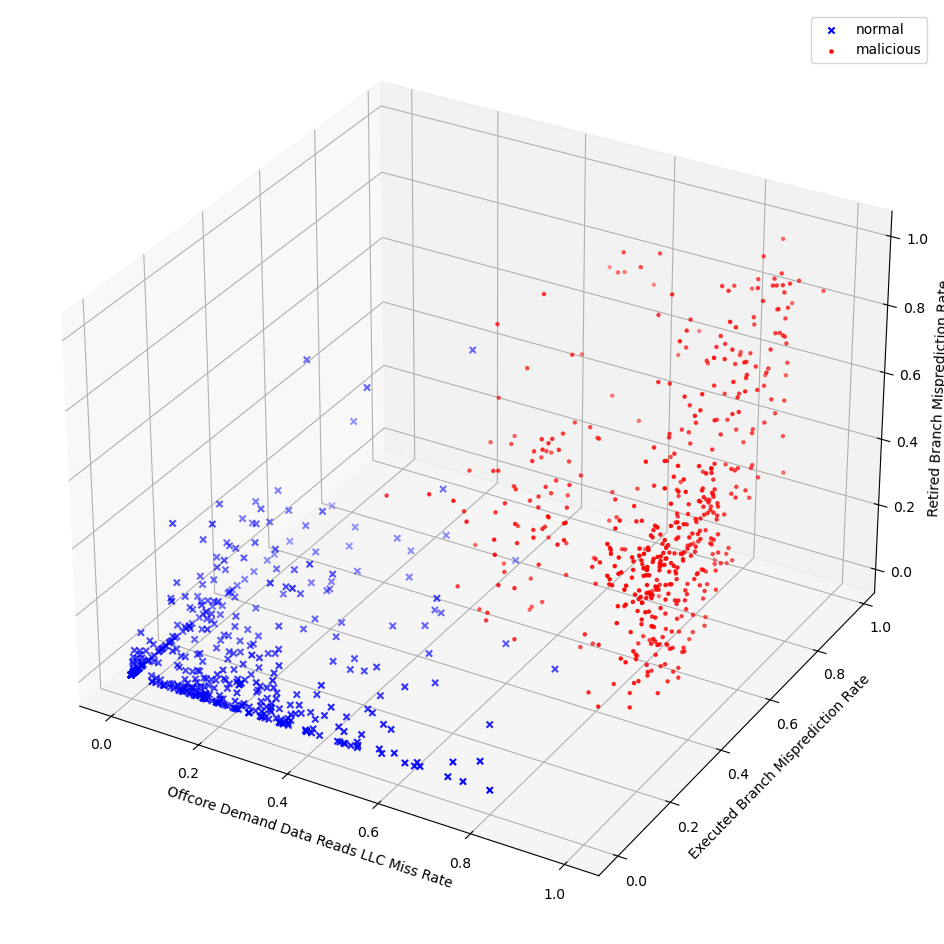

In [40]:
# Call the function
plot_scatter(
    average_rows(idle_df_2)[:500],
    average_rows(attack_df_2)[:500],
    file_name="rate_3d_scatter_comparison_2.png"
)

Plot saved at: ../images/paper/rate_3d_scatter_comparison_3.png
Offcore Demand Data Reads LLC Miss Rate vs Executed Branch Misprediction Rate vs Retired Branch Misprediction Rate


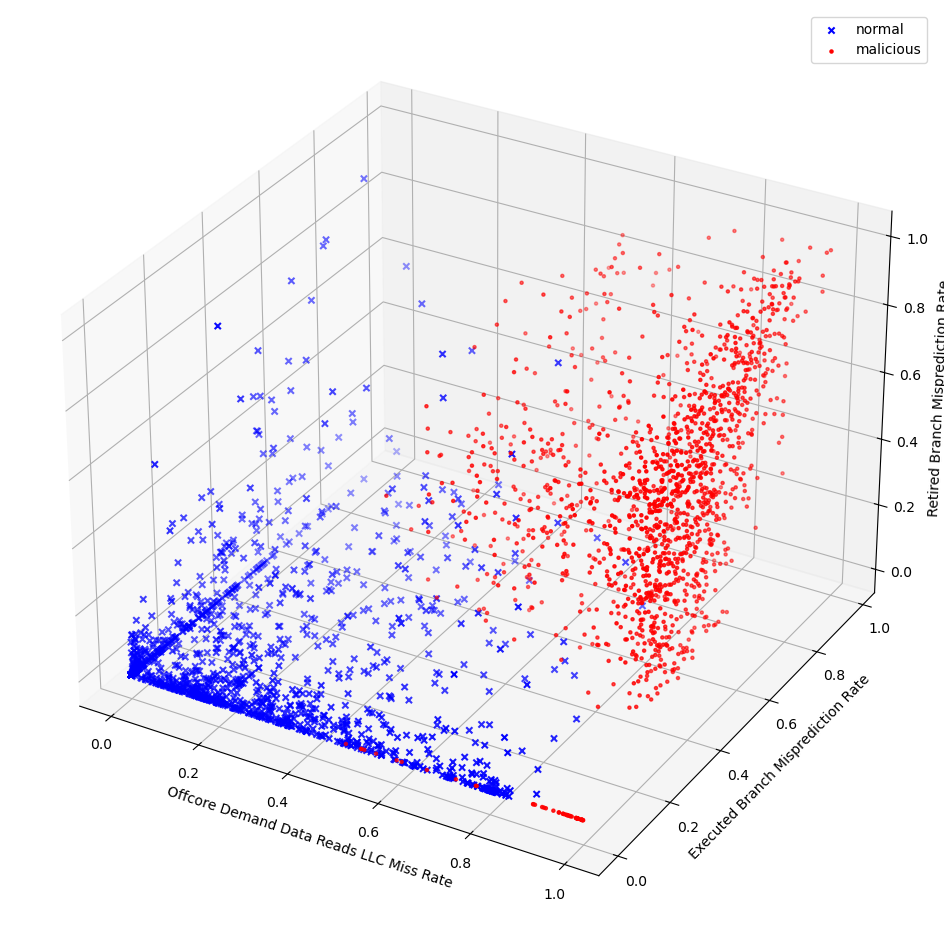

In [41]:
idle_average = average_rows(pd.concat([idle_df_1[:2500], idle_df_2[:2500], idle_df_3[:2500]], axis=0, ignore_index=True))
attack_average = average_rows(pd.concat([attack_df_1[:2500], attack_df_2[:2500], attack_df_3[:2500]], axis=0, ignore_index=True))


# Call the function
plot_scatter(
    idle_average,
    attack_average,
    file_name="rate_3d_scatter_comparison_3.png"
)